<a href="https://colab.research.google.com/github/jgr11082003/CODSOFT/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()


Saving MOVIE RATING PREDICTION WITH PYTHON.zip to MOVIE RATING PREDICTION WITH PYTHON.zip


In [6]:
import io
import zipfile

# Open the zip file in bytes mode
with zipfile.ZipFile(io.BytesIO(uploaded['MOVIE RATING PREDICTION WITH PYTHON.zip']), 'r') as z:
    # Get a list of files in the zip
    file_list = z.namelist()
    # Assuming the CSV is the first file in the zip
    csv_file_name = file_list[0]
    # Open the CSV file from within the zip
    with z.open(csv_file_name, 'r') as f:
        # Read the CSV using pandas, specifying the appropriate encoding if needed
        df = pd.read_csv(f, encoding='latin-1') # or 'cp1252', experiment with other encodings if necessary

In [7]:
print(df.head())
print(df.info())
print(df.describe())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [8]:
df.fillna({'Genre': 'Unknown', 'Director': 'Unknown', 'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 'Actor 3': 'Unknown'}, inplace=True)


In [9]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')



In [10]:
df.dropna(subset=['Rating'], inplace=True)

In [11]:
label_encoders = {}
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [13]:
x = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Changed X to x

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.6475792115856485
R^2 Score: 0.11379742465064835


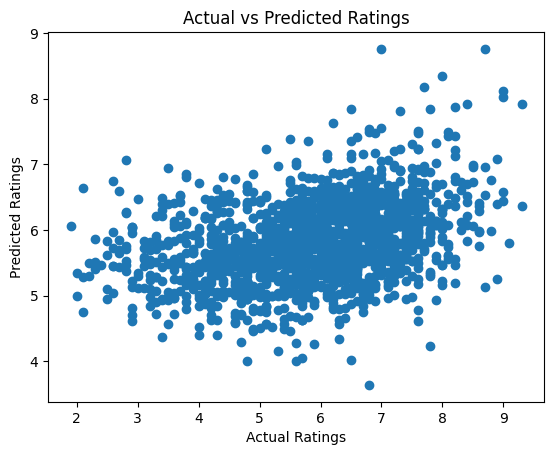

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

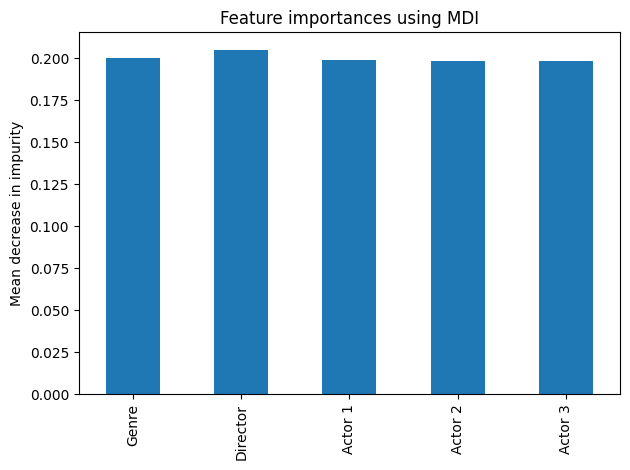

In [20]:
importances = model.feature_importances_
feature_names = x.columns # Changed X to x to match the variable name where features are stored
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()